In [1]:
!pip install xgboost

In [2]:
#importing initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

In [3]:
print(xgb.__version__)

2.1.3


# Reading the dataset

In [4]:
#reading the data and keeping the index as the date and time

data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)

In [5]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [6]:
#drop duplicate values from data
data.drop_duplicates(inplace=True)

In [7]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [8]:
data.shape

(95185, 21)

In [9]:
data.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [10]:
# Drop columns with insufficient unique value because of lack of contribution to model accuracy
data.drop(['ControlBoxTemperature','WTG'], axis=1, inplace=True)

In [11]:
data.shape

(95185, 19)

In [12]:
data.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [13]:
# Since power cannot be negative pick only entries with positive or 0 active power 
data =  data[data['ActivePower']>=0]

In [14]:
data.shape

(78989, 19)

### DATA PREPROCESSING

In [15]:
#check for null values in columns 
data.isna().sum()

ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64

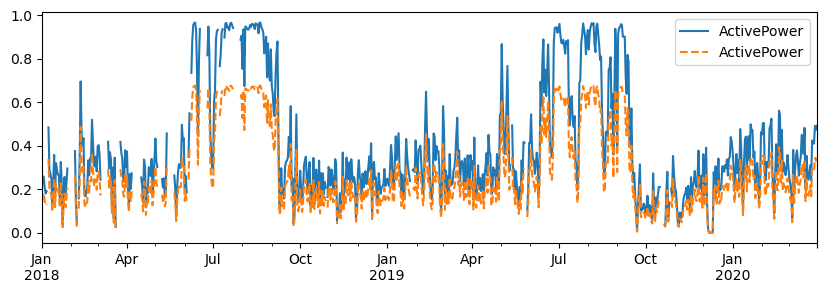

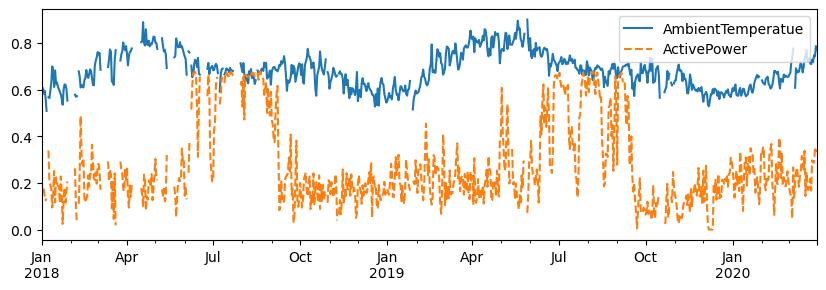

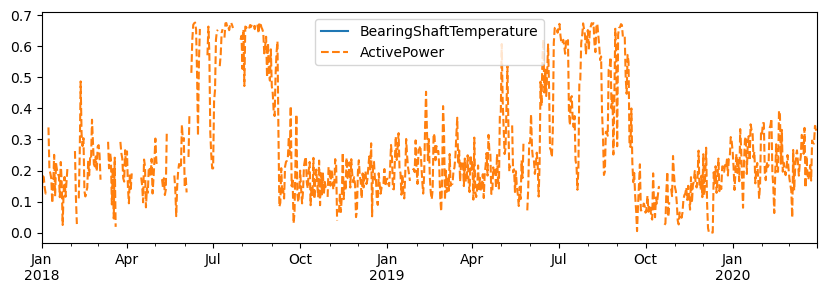

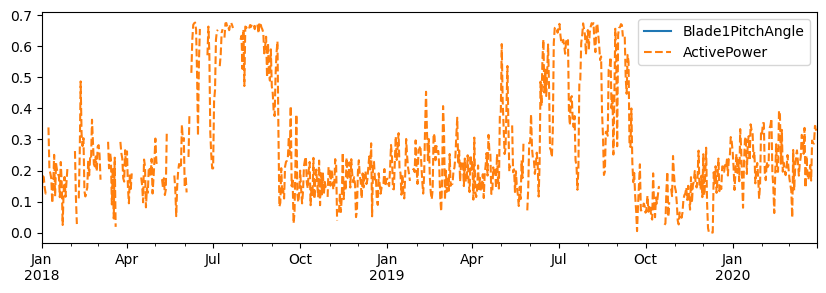

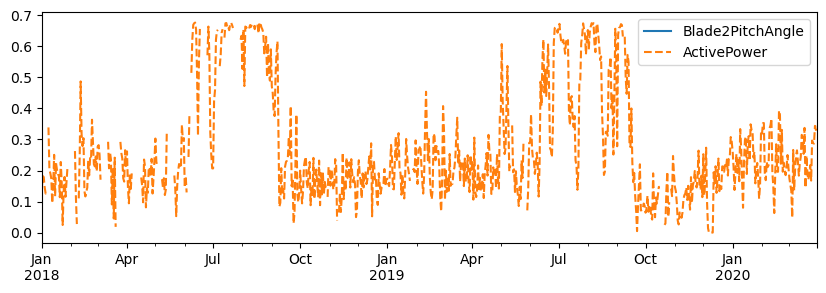

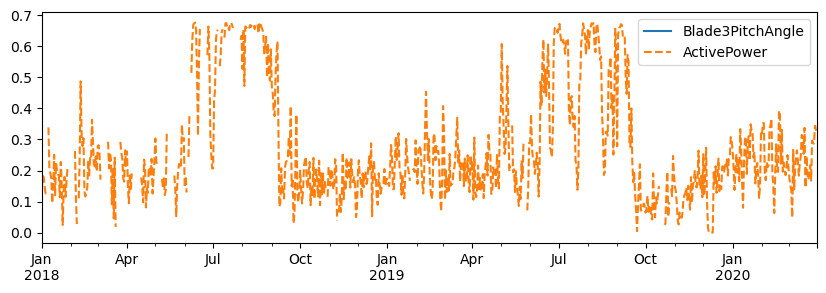

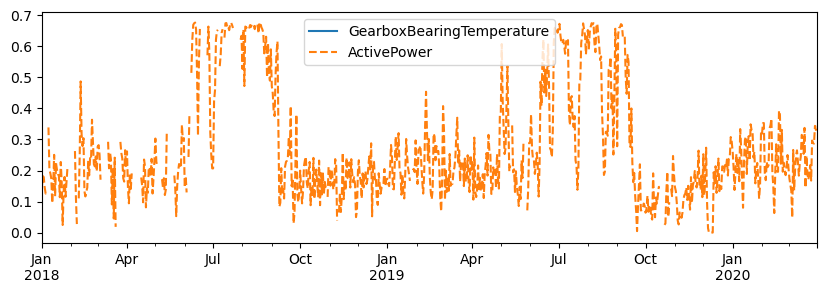

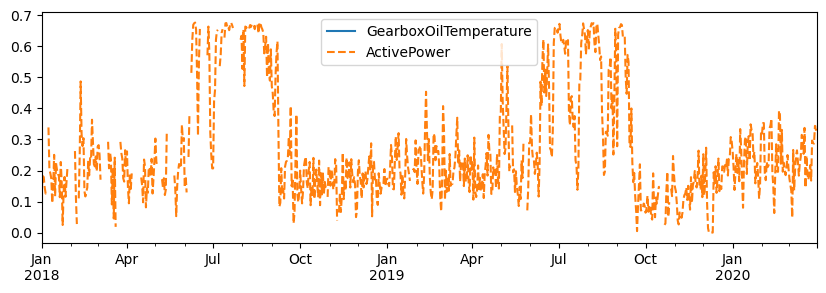

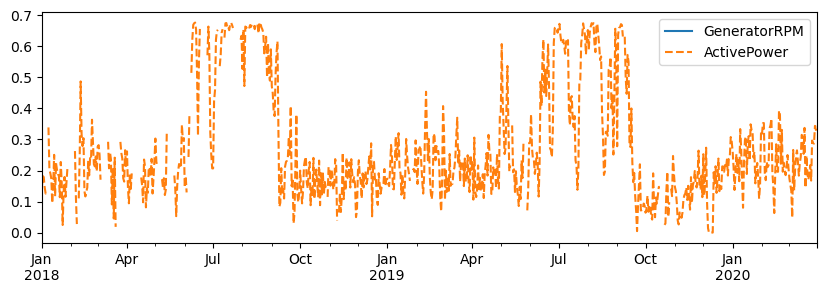

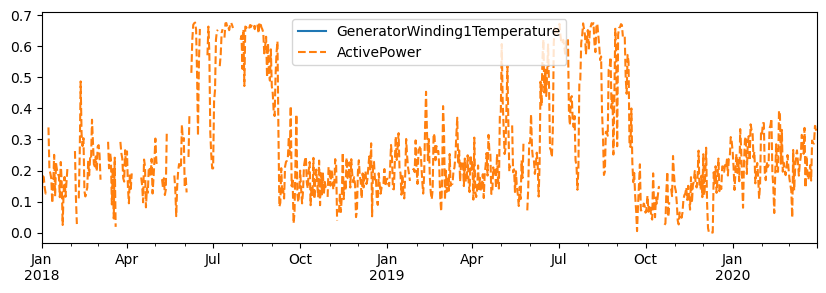

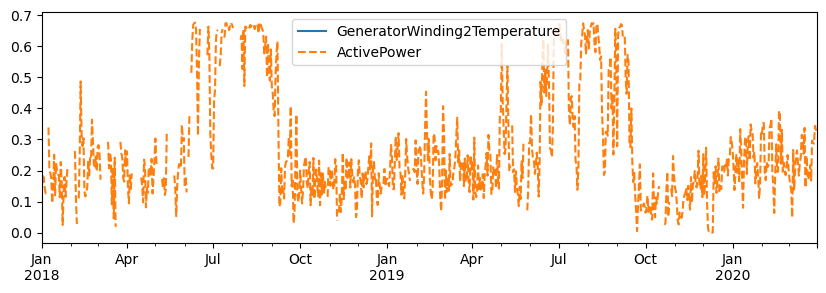

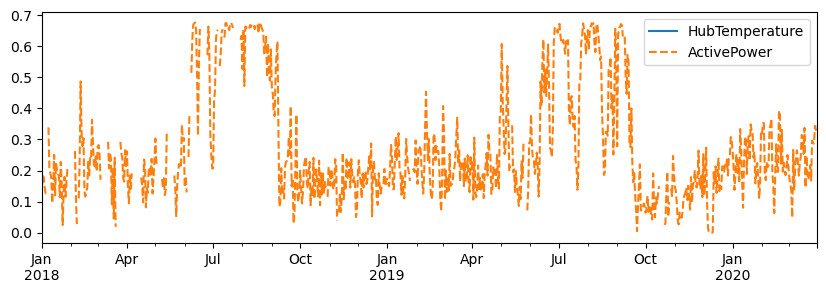

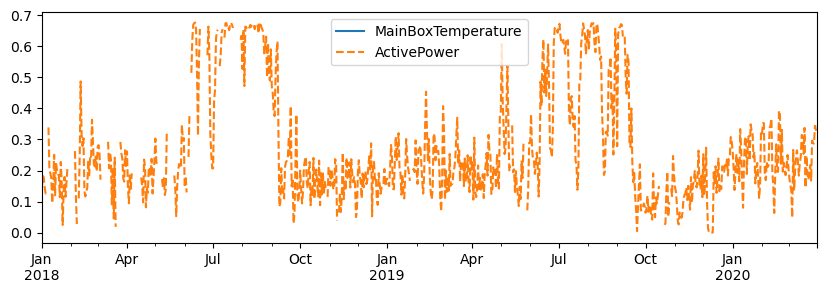

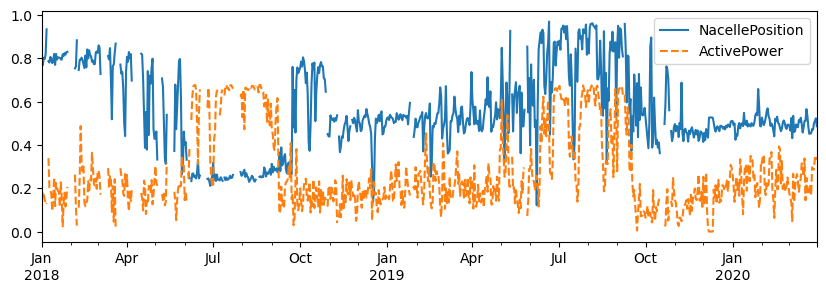

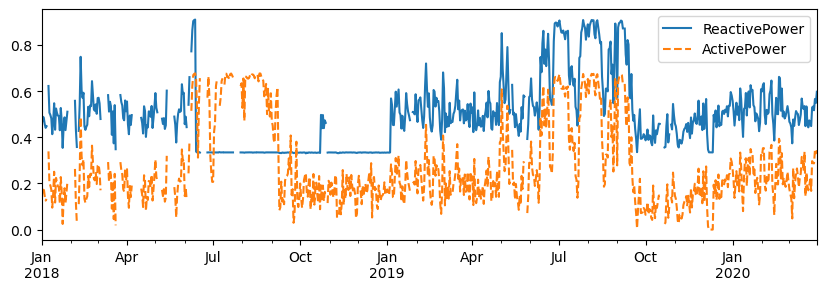

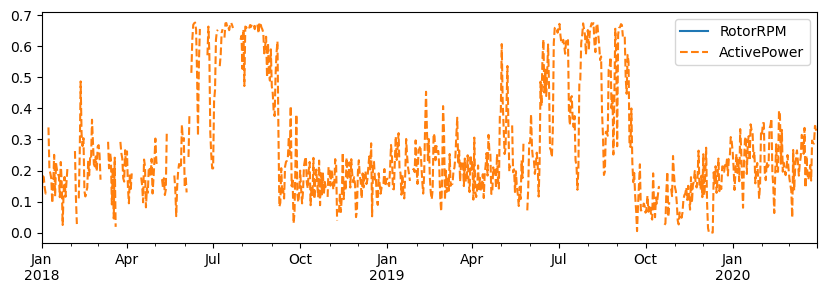

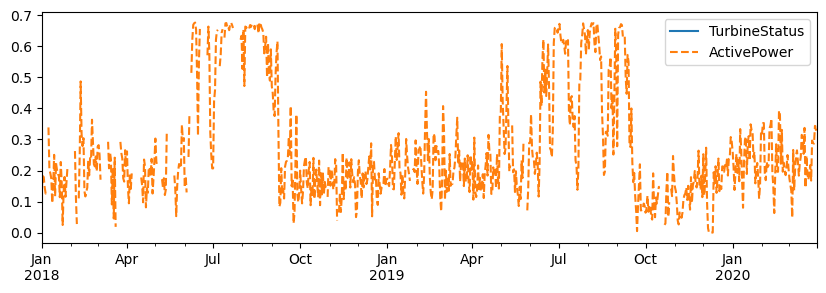

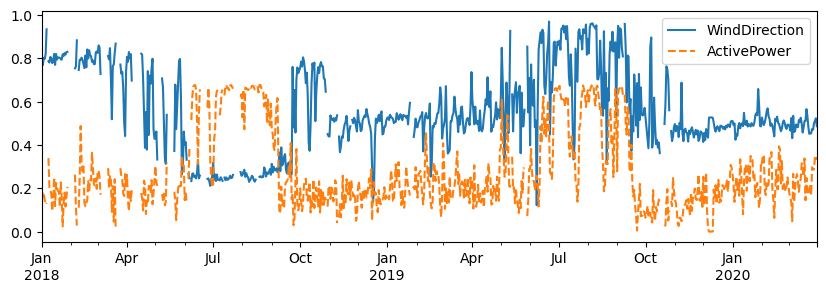

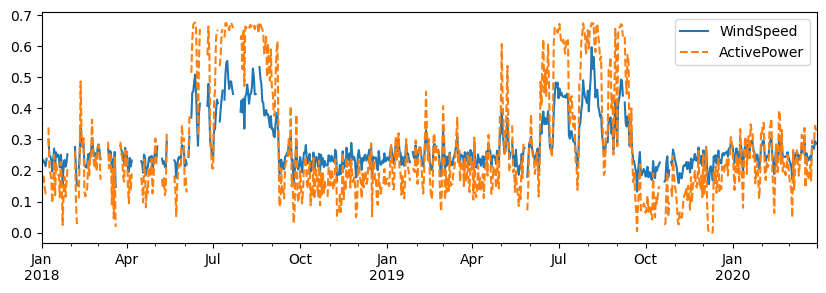

In [16]:
#data visualization to see the various feature variables in the dataset aligning with active power 
d2 = data.copy()
for i in data:
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i]- mini)/(maxi-mini)
    
    # Resample from 10 minute intervals to daily intervals to be clearer to read
    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

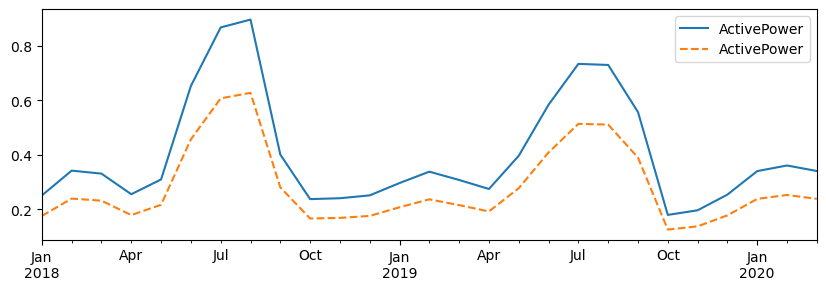

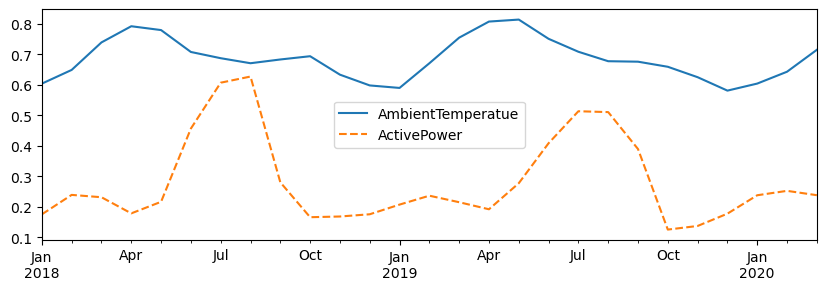

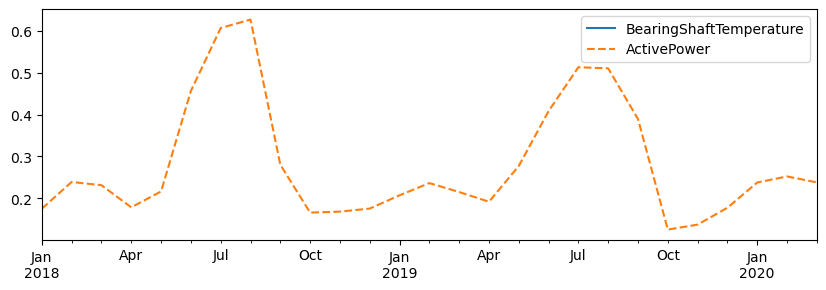

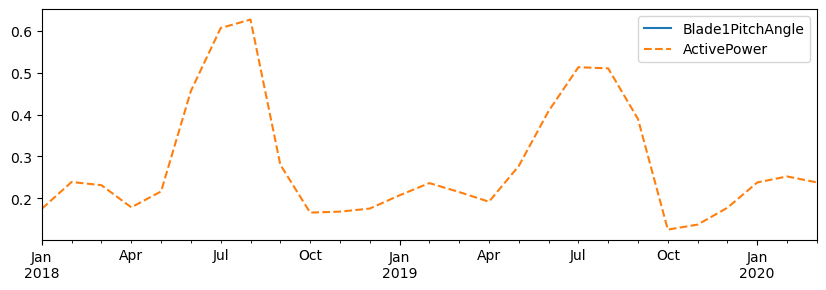

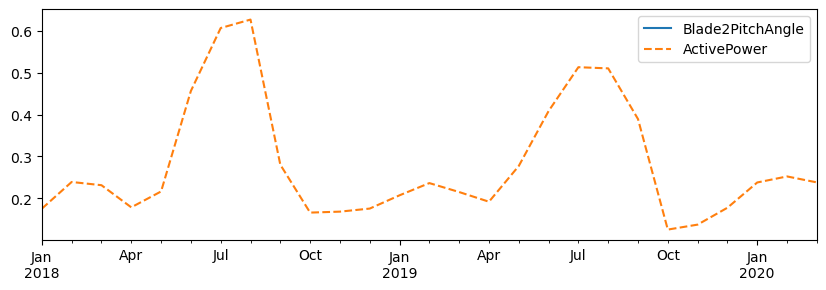

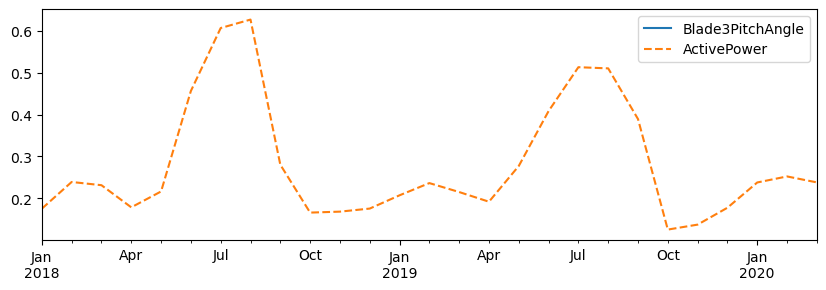

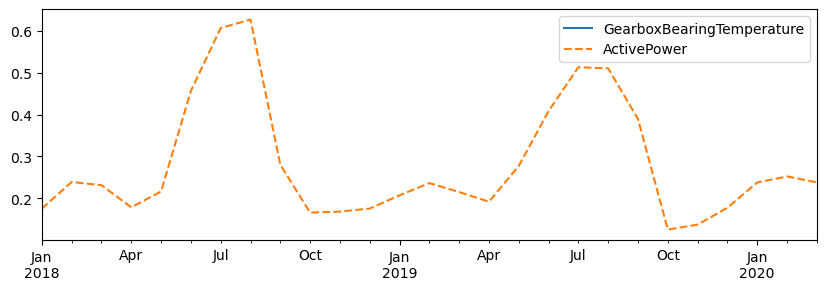

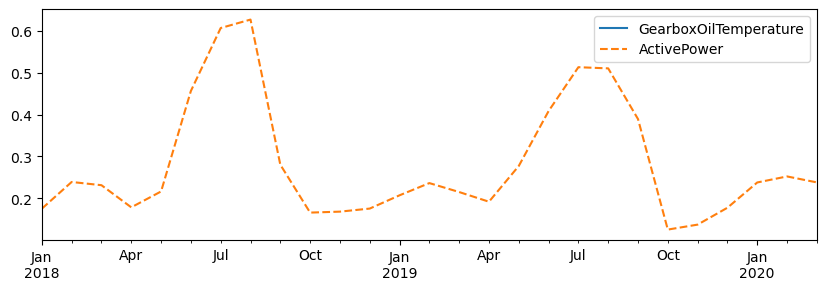

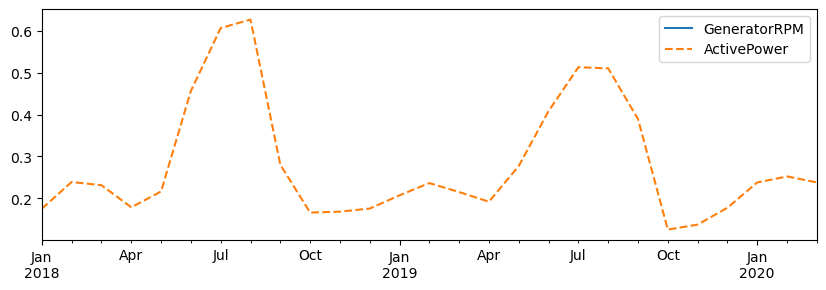

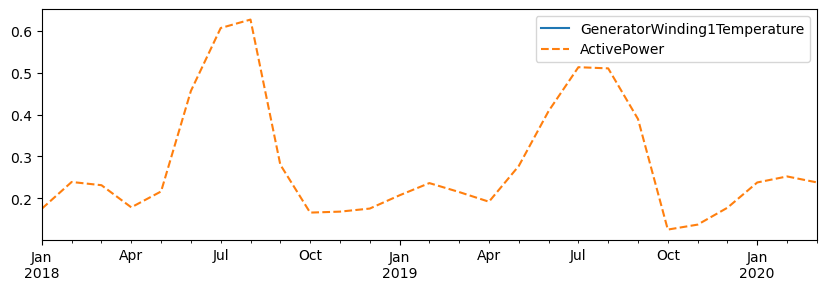

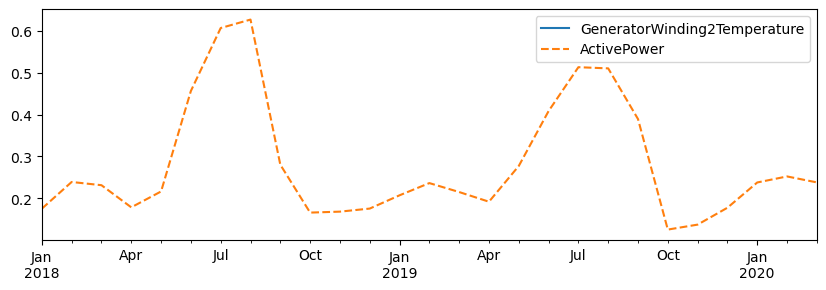

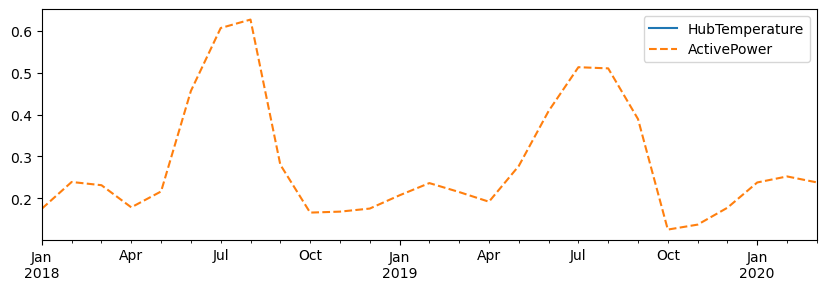

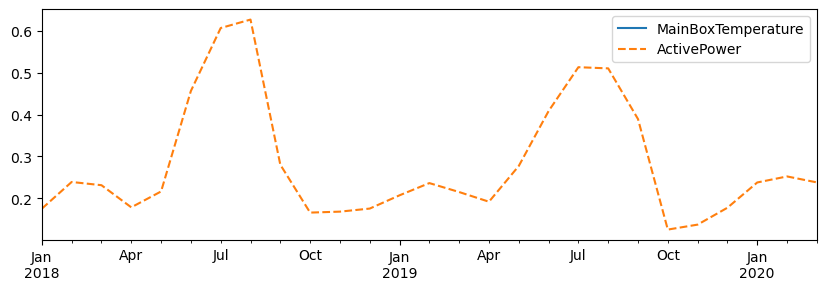

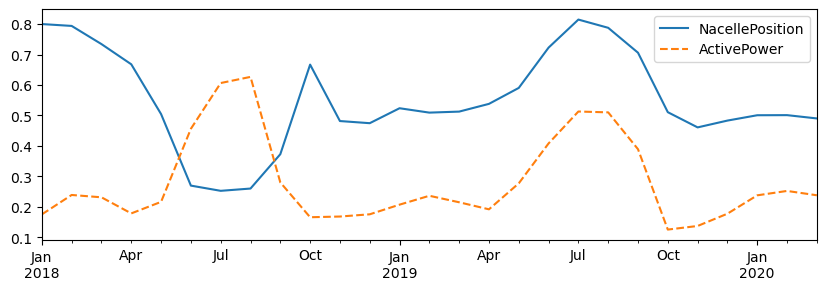

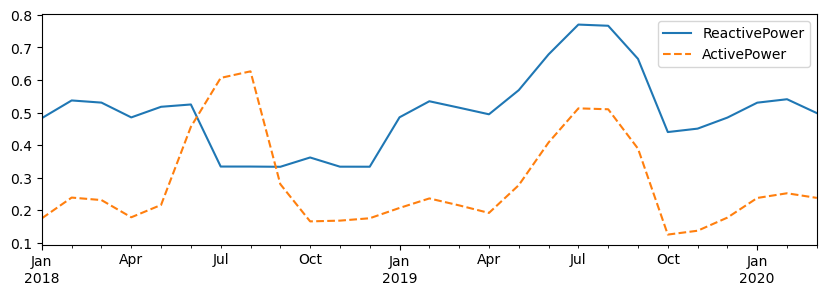

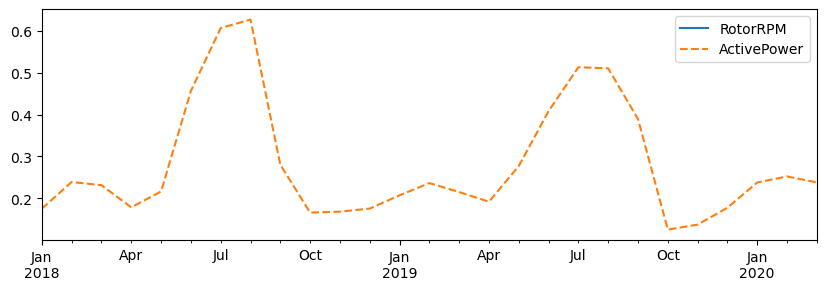

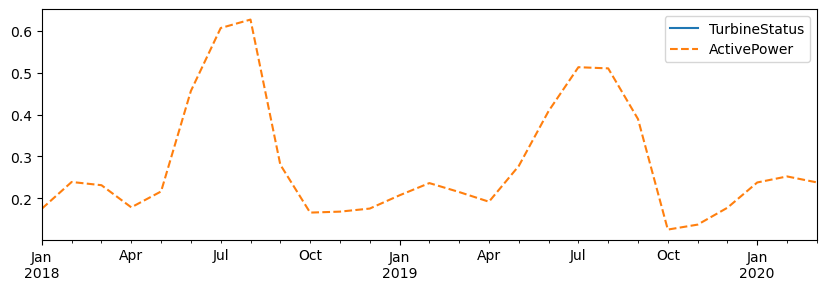

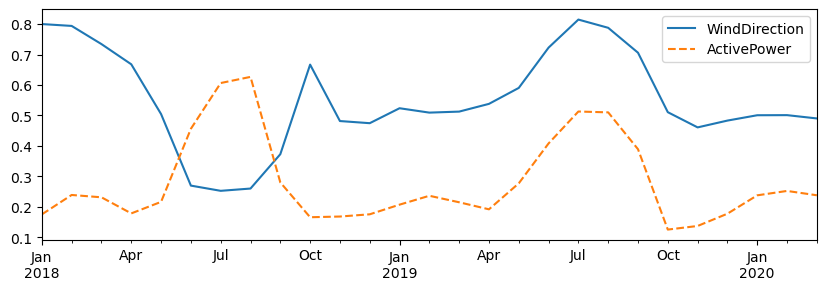

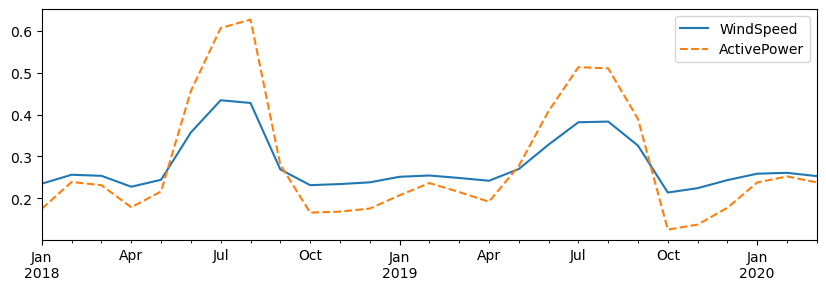

In [17]:
# visualization of data relatability of various feature variables in terms of months 
for i in data:

    
    plt.figure(figsize=(10,3))
    d2[i].resample('M').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

<Axes: >

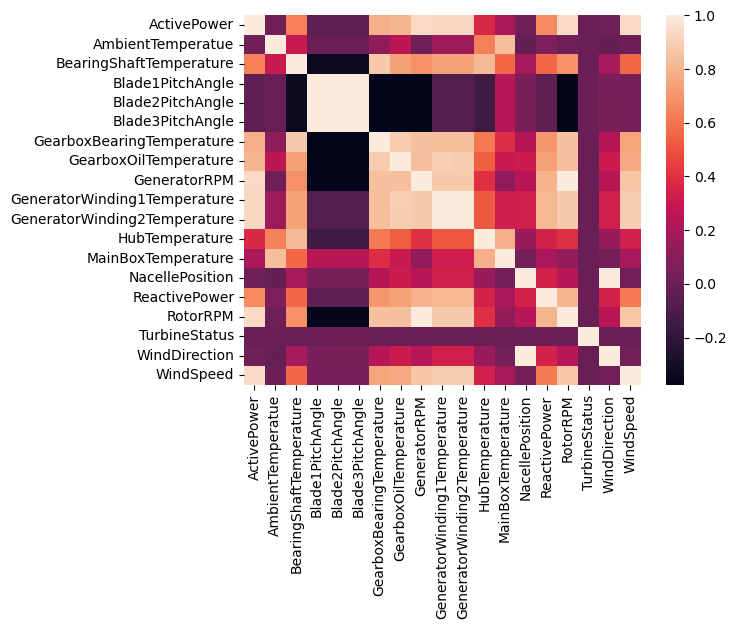

In [18]:
# Check correlation using heatmap
sns.heatmap(data.corr())

In [19]:
# Unstack the dataframe and sort the values in descending order to check high correlation with active power(target variable)
correlations = data.corr().unstack().sort_values(ascending=False) 

# checking  ActivePower correlations
correlations['ActivePower'].drop_duplicates()

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
NacellePosition                 0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
Blade1PitchAngle               -0.042637
Blade3PitchAngle               -0.042700
dtype: float64

In [20]:
# Picking windspeed and active power columns to predict Future Active power with high accuracy 

data = data[['ActivePower','WindSpeed']]
data.dropna()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468


In [21]:
len(data)

78989

In [22]:
# we cannot randomly split this data because this data is a time series data which needs to be in a sequence 
# so we have to manually split the data USING LIST SPLICING 
# with 78000 for training and 989 for testing 
X_train, X_test, y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 989, 78000, 989)

## MODEL CREATION 

### Model Type
Gradient Boosting - ensemble training 

Multiple machine learning models used in parallel to train same data 

It is made up of multiple decision trees to minimize error and maximize accuracy 

In [23]:
# Extreme gradient boosting
# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    n_estimators=200,
    objective="reg:squarederror",  # For regression tasks
)


In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",  # Adjust metric based on your preference
}

evallist = [(dtrain, "train"), (dtest, "eval")]

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=evallist,
    early_stopping_rounds=50,
    verbose_eval=True
)


[0]	train-rmse:421.79117	eval-rmse:367.13874
[1]	train-rmse:301.32622	eval-rmse:266.99862
[2]	train-rmse:219.29896	eval-rmse:199.54566
[3]	train-rmse:164.78250	eval-rmse:155.34570
[4]	train-rmse:129.95348	eval-rmse:127.54062
[5]	train-rmse:108.87863	eval-rmse:110.79585
[6]	train-rmse:96.88342	eval-rmse:101.17347
[7]	train-rmse:90.42261	eval-rmse:95.79071
[8]	train-rmse:87.07759	eval-rmse:92.79709
[9]	train-rmse:85.38884	eval-rmse:91.12945
[10]	train-rmse:84.54651	eval-rmse:90.17631
[11]	train-rmse:84.13030	eval-rmse:89.60735
[12]	train-rmse:83.92389	eval-rmse:89.26358
[13]	train-rmse:83.82089	eval-rmse:89.05939
[14]	train-rmse:83.77060	eval-rmse:88.93478
[15]	train-rmse:83.74575	eval-rmse:88.84768
[16]	train-rmse:83.73308	eval-rmse:88.78799
[17]	train-rmse:83.72592	eval-rmse:88.74587
[18]	train-rmse:83.72209	eval-rmse:88.71875
[19]	train-rmse:83.72034	eval-rmse:88.69916
[20]	train-rmse:83.71912	eval-rmse:88.68839
[21]	train-rmse:83.71852	eval-rmse:88.67835
[22]	train-rmse:83.71810	eval

[184]	train-rmse:83.71629	eval-rmse:88.65828
[185]	train-rmse:83.71629	eval-rmse:88.65830
[186]	train-rmse:83.71629	eval-rmse:88.65830
[187]	train-rmse:83.71629	eval-rmse:88.65829
[188]	train-rmse:83.71629	eval-rmse:88.65829
[189]	train-rmse:83.71629	eval-rmse:88.65828
[190]	train-rmse:83.71629	eval-rmse:88.65828
[191]	train-rmse:83.71629	eval-rmse:88.65828
[192]	train-rmse:83.71629	eval-rmse:88.65828
[193]	train-rmse:83.71629	eval-rmse:88.65828
[194]	train-rmse:83.71629	eval-rmse:88.65828
[195]	train-rmse:83.71629	eval-rmse:88.65828
[196]	train-rmse:83.71629	eval-rmse:88.65829
[197]	train-rmse:83.71629	eval-rmse:88.65827
[198]	train-rmse:83.71629	eval-rmse:88.65827
[199]	train-rmse:83.71629	eval-rmse:88.65828


In [25]:
#Predict the output variables 
pred = model.predict(dtest)

In [26]:
#create dataframe to store actual and predicted values 
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred })  

In [27]:
# determine all different metrics for this particular predictions
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions'])))  

The Coefficient of determination (R-squared) = 0.970
The mean absolute error (MAE)                = 63.05
The RMSE error (RMSE)                        = 88.66
The Mean absolute percentage error (MAPE)    = 0.475


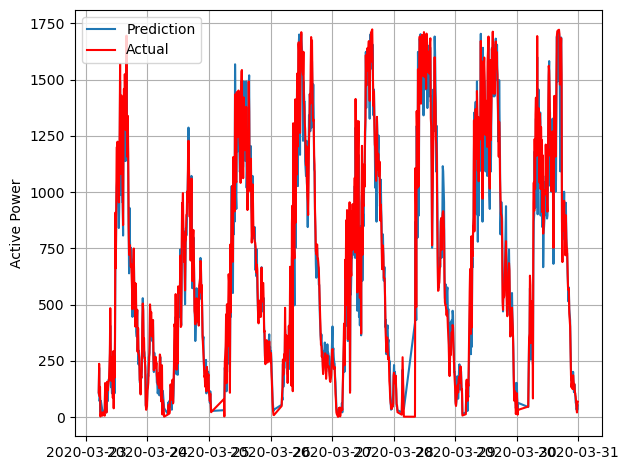

In [28]:
#Visualize the predictions to actual data
plt.plot(df_final['Predictions'],label='Prediction')
plt.plot(df_final['Actuals'], color='red',label='Actual')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<Axes: ylabel='ActivePower'>

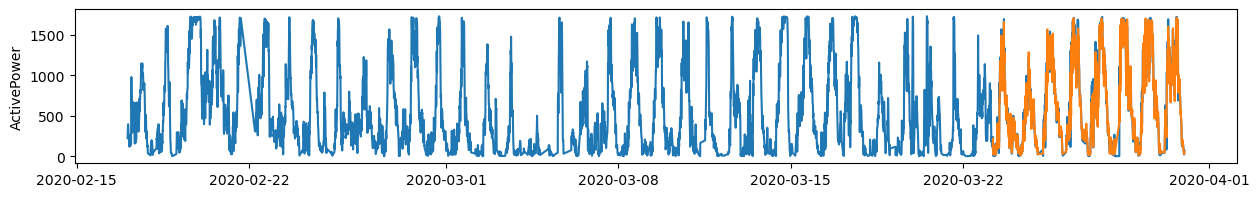

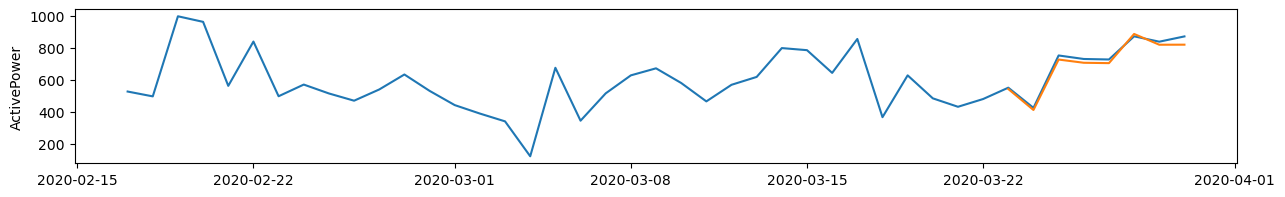

In [29]:
# Visualize the entire datset to visualize predictions
#Frequency of 10 minutes 
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

#Frequency of days
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())

## NEW MODEL TESTS USING ONLY DATES AS FEATURES 

Incase we did not have wind speed and wanted to predict future ActivePower values using dates only
Create a Flask Webapp, where the user can enter a date range to predict energy generated 

In [30]:
data.tail()

,ActivePower,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468
2020-03-30 23:50:00+00:00,68.664425,3.475205


In [71]:
#Create a new dataframe with dates ranging from April to June after the dates used in the initial dataset 
# Setting the frequency to ten minutes is telling the function date range to create values at every 10 minutes within that time 
new = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min')
new = pd.DataFrame(index=new)

In [72]:
# the length contains how many values we are going to predict 
len(new)

8785

In [73]:
# FUNCTION TO GENERATE NEW FEATURES FOR MODEL TO TRAIN ON 
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [74]:
# create copy of original dataframe and pass the dataframe through the create function 
data2 = data.copy()
data2 = create_f(data2)

In [75]:
data2.head()

,ActivePower,WindSpeed,hour,minute,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,6,20,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,6,40,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,6,50,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,10,40,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,12,0,1,1,2018,0,1,1


In [76]:
data2.columns

Index(['ActivePower', 'WindSpeed', 'hour', 'minute', 'day', 'month', 'year',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [77]:
data2.isna().sum()
data2 = data2.dropna()

In [79]:
#Train a new model using these features we set for the new datetime format 
# Since data is a time series data once again we cannot randomly split it 
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'
X_train, X_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [78]:
# Create model 2 using Extreme Gradient Boosting again 
# Convert training and testing data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define model parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.01,           # Learning rate
    "eval_metric": "rmse"            # Evaluation metric
}

# Specify the evaluation set
evals = [(dtrain, "train"), (dtest, "eval")]

# Train the model
model2 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,           # Equivalent to n_estimators=1000
    evals=evals,                    # Evaluation sets
    early_stopping_rounds=50,       # Early stopping if no improvement
    verbose_eval=True               # Prints training progress
)


[0]	train-rmse:590.64594	eval-rmse:532.72471
[1]	train-rmse:587.33865	eval-rmse:532.33787
[2]	train-rmse:584.05707	eval-rmse:531.97837
[3]	train-rmse:580.83841	eval-rmse:531.64552
[4]	train-rmse:577.62910	eval-rmse:530.97189
[5]	train-rmse:574.46608	eval-rmse:530.32547
[6]	train-rmse:571.34893	eval-rmse:529.70565
[7]	train-rmse:568.26714	eval-rmse:529.09509
[8]	train-rmse:565.23902	eval-rmse:528.50664
[9]	train-rmse:562.25033	eval-rmse:528.20211
[10]	train-rmse:559.29827	eval-rmse:527.65601
[11]	train-rmse:556.39551	eval-rmse:527.39468
[12]	train-rmse:553.52957	eval-rmse:526.88901
[13]	train-rmse:550.72345	eval-rmse:526.65845
[14]	train-rmse:547.94108	eval-rmse:526.19693
[15]	train-rmse:545.20217	eval-rmse:525.97299
[16]	train-rmse:542.51043	eval-rmse:525.81030
[17]	train-rmse:539.84676	eval-rmse:525.39947
[18]	train-rmse:537.22700	eval-rmse:525.22530
[19]	train-rmse:534.59059	eval-rmse:524.76489
[20]	train-rmse:532.04198	eval-rmse:524.39922
[21]	train-rmse:529.57701	eval-rmse:524.3114

In [80]:
#Predict using the x test
pred = model2.predict(dtest)

In [81]:
# Create new dataframe having actual values and predictions 
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred})  

In [82]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final2['Actuals'],df_final2['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final2['Actuals'],df_final2['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final2['Actuals'],df_final2['Predictions'])))  

The Coefficient of determination (R-squared) = 0.031
The mean absolute error (MAE)                = 426.99
The RMSE error (RMSE)                        = 522.42
The Mean absolute percentage error (MAPE)    = 3.304


<Axes: ylabel='ActivePower'>

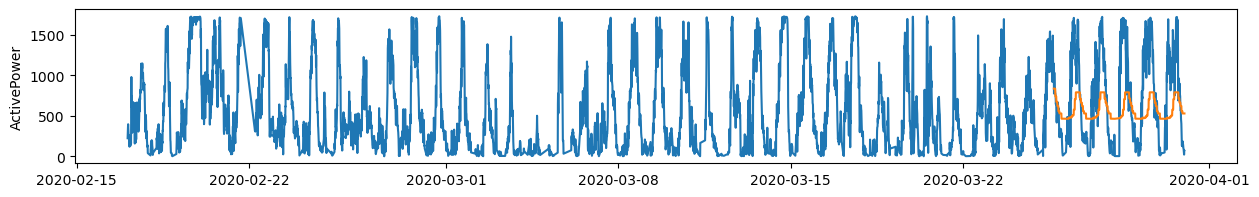

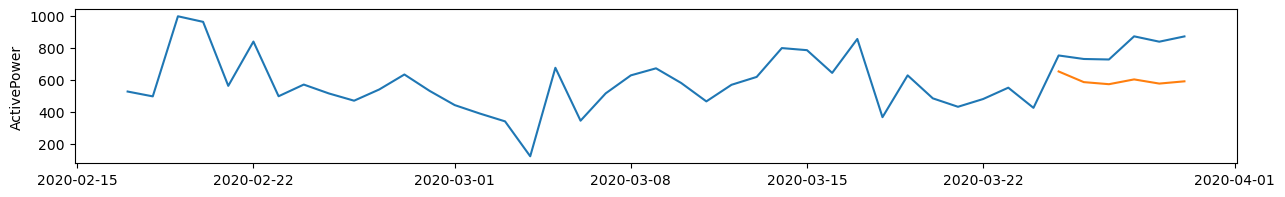

In [83]:
# Plot the actual data to the predictions in 10 minute timeframes 
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df_final2['Predictions'])

# Plot the actual data to predictions using daily timeframes 
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df_final2['Predictions'].resample('D').mean())

In [85]:
# Use the create features functions to create features for the new dataframe 
# Apply your custom function to transform 'new'
new = create_f(new)

# Print the head of the selected features
print(new[features].head())

# Convert the features to DMatrix format for prediction
new_dmatrix = xgb.DMatrix(new[features])

# Predict using the Booster model from xgb.train
fut = model2.predict(new_dmatrix)

# Create a DataFrame for the predictions
future = pd.DataFrame(data={"Predictions": fut}, index=new.index)

# Display the predictions
print(future)
 

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  
                           Predictions
2020-04-01 12:00:00+00:00   610.041992
2020-04-01 12:10:00+00:00   610.041992
2020-04-01 12:20:00+00:00   610.041992
2020-04-01 12:30:00+00:00   610.041992
2020-04-01 12:40:00+00:00   610.041992
...                                ...
2020-06-01 11:20:00+00:00   591.338257
2020-06-01 11:30:00+0

<Axes: ylabel='ActivePower'>

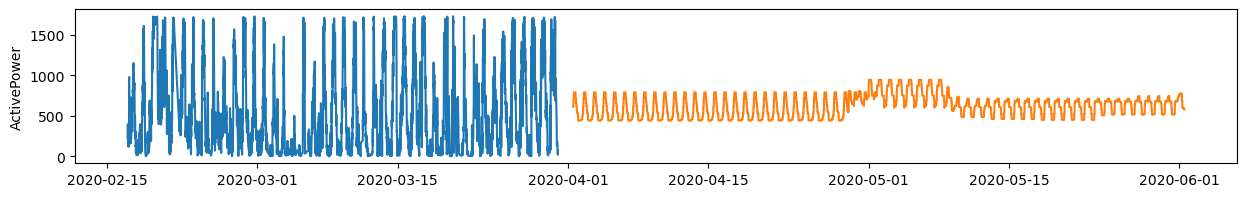

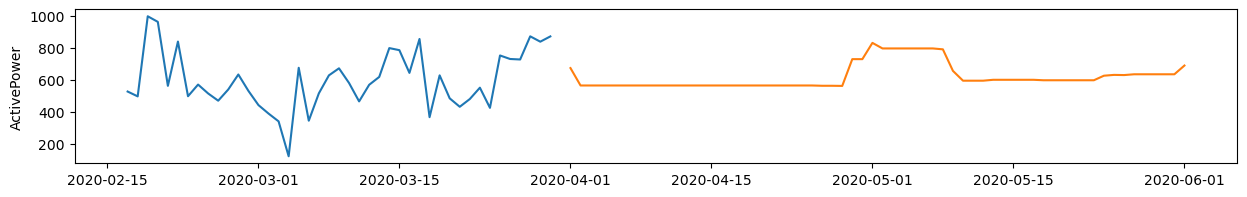

In [86]:
# Plot new predictions 
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean())

# saving the models

In [87]:
# Saving model to use in flaskapp
import pickle
file_name = "model2.pkl"
#model.save_model('model1.json')
pickle.dump(model2, open(file_name, "wb"))
